#### Indexación espacial con H3 (Hierarchical Hexagonal Geospatial Indexing System)
Proceso de carga de datos, transformación a H3 y devolución en geodataframe
Objetos espaciales: barrios por link/población

In [2]:
# cargar las librerías

import matplotlib.pyplot as plt
import matplotlib
import h3
import pandas as pd 
import geopandas as gpd
import folium
import branca.colormap as cm
import shapely
from shapely.geometry import Point

In [3]:
barrios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\GIS\proyecto principal censo\join barrios x link poblacion\shp join barrios x link poblacion\4326\join_barrios_x_link_pob_4326.shp")
barrios.head(1)

,fid,nombre,join_barri,geometry
0,1.0,Chacras Oeste,1564,"POLYGON ((-67.66072 -45.88205, -67.66071 -45.8..."


In [4]:
geo = barrios.geometry[0]
type(geo)

shapely.geometry.polygon.Polygon

In [5]:
# activar la función de la librería de shapely

shapely.geometry.multipolygon.MultiPolygon

shapely.geometry.multipolygon.MultiPolygon

In [6]:
# pedir a (h3) los códigos de celda (valores que representan el centroide de cada celda)
# para cada polígono del geodataframe

h3.geo_to_cells(geo, res = 10)

['8acf9e16cca7fff',
 '8acf9e165a5ffff',
 '8acf9eb9ea97fff',
 '8acf9e16c407fff',
 '8acf9e16c857fff',
 '8acf9eb9220ffff',
 '8acf9eb92887fff',
 '8acf9eb92aaffff',
 '8acf9eb90607fff',
 '8acf9eb9151ffff',
 '8acf9eb9e86ffff',
 '8acf9e16d997fff',
 '8acf9eb910cffff',
 '8acf9eb91747fff',
 '8acf9eb912f7fff',
 '8acf9eb9e41ffff',
 '8acf9eb9379ffff',
 '8acf9eb93577fff',
 '8acf9eb93127fff',
 '8acf9eb9334ffff',
 '8acf9e16c62ffff',
 '8acf9eb93a5ffff',
 '8acf9eb9ed57fff',
 '8acf9eb9360ffff',
 '8acf9eb9e4b7fff',
 '8acf9eb9e907fff',
 '8acf9e16d807fff',
 '8acf9eb9138ffff',
 '8acf9eb93837fff',
 '8acf9eb93c87fff',
 '8acf9e16c04ffff',
 '8acf9eb9069ffff',
 '8acf9eb92b47fff',
 '8acf9e16cb17fff',
 '8acf9eb915b7fff',
 '8acf9e16da2ffff',
 '8acf9eb9e067fff',
 '8acf9eb9024ffff',
 '8acf9eb924cffff',
 '8acf9e16c277fff',
 '8acf9e16dc57fff',
 '8acf9eb9eb2ffff',
 '8acf9eb92d6ffff',
 '8acf9e16c8effff',
 '8acf9e161a47fff',
 '8acf9e16e947fff',
 '8acf9eb9e6dffff',
 '8acf9eb93af7fff',
 '8acf9eb9302ffff',
 '8acf9eb93257fff',


In [7]:
# este nunca funciona

plot_cells(h3.geo_to_cells(geo, res = 10))

NameError: name 'plot_cells' is not defined

In [8]:
# convertir todas las geometrías de un geodataframe a celdas

cell_column = barrios.geometry.apply(lambda x: h3.geo_to_cells(x, res =10))
cell_column


0     [8acf9e16cca7fff, 8acf9e165a5ffff, 8acf9eb9ea9...
1     [8acf9e140b4ffff, 8acf9e14006ffff, 8acf9e16ed8...
2     [8acf9e145477fff, 8acf9e145b8ffff, 8acf9e1632d...
3     [8acf9e145437fff, 8acf9e14094ffff, 8acf9e14084...
4     [8acf9e1610d7fff, 8acf9e1612a7fff, 8acf9e16147...
                            ...                        
64    [8acf9e14695ffff, 8acf9e146857fff, 8acf9e1469a...
65    [8acf9e173877fff, 8acf9e17394ffff, 8acf9e17384...
66    [8acf9e1702cffff, 8acf9e171587fff, 8acf9e17396...
67    [8acf9e171507fff, 8acf9e17155ffff, 8acf9e17026...
68    [8acf9e15554ffff, 8acf9e155467fff, 8acf9e1550a...
Length: 69, dtype: object

In [9]:
# convertir celdas a "geo objetos" 

shape_column = cell_column.apply(h3.cells_to_h3shape)
shape_column

0     <LatLngPoly: [524]>
1     <LatLngPoly: [526]>
2     <LatLngPoly: [142]>
3      <LatLngPoly: [44]>
4     <LatLngPoly: [114]>
             ...         
64     <LatLngPoly: [64]>
65     <LatLngPoly: [36]>
66     <LatLngPoly: [42]>
67     <LatLngPoly: [60]>
68     <LatLngPoly: [28]>
Length: 69, dtype: object

In [10]:
shape_column[0]

<LatLngPoly: [524]>

In [11]:
shape_column[1]

<LatLngPoly: [526]>

In [12]:
# ahora, si asignamos *df*.geometry = shape_column, nuestros objetos H3Shape
# se van a convertir automáticamente a objetos polígono y multipolígono
# de shapely vía geo_interface

barrios.geometry = shape_column
barrios.geometry

0     POLYGON ((-67.59249 -45.88111, -67.59284 -45.8...
1     POLYGON ((-67.54688 -45.83681, -67.54773 -45.8...
2     POLYGON ((-67.56284 -45.85300, -67.56319 -45.8...
3     POLYGON ((-67.56112 -45.85608, -67.56062 -45.8...
4     POLYGON ((-67.59299 -45.88161, -67.59384 -45.8...
                            ...                        
64    POLYGON ((-67.53311 -45.86148, -67.53226 -45.8...
65    POLYGON ((-67.50491 -45.86862, -67.50456 -45.8...
66    POLYGON ((-67.50755 -45.87227, -67.50671 -45.8...
67    POLYGON ((-67.50981 -45.86683, -67.51065 -45.8...
68    POLYGON ((-67.50062 -45.83719, -67.50012 -45.8...
Name: geometry, Length: 69, dtype: geometry

In [13]:
# pido el tipo de objeto dentro de la columna geometría del gfd barrios

type(barrios.geometry[0])

shapely.geometry.polygon.Polygon

In [14]:
# tomamos algunos objetos con geometría shapely, los convertimos a celdas *H3*
# y volvimos a convertirlos a objetos con geometría shapely en un GDF de geopandas
# para visualizar los resultados podemos usar

plot_df(barrios, column = "join barri")

NameError: name 'plot_df' is not defined

<Axes: >

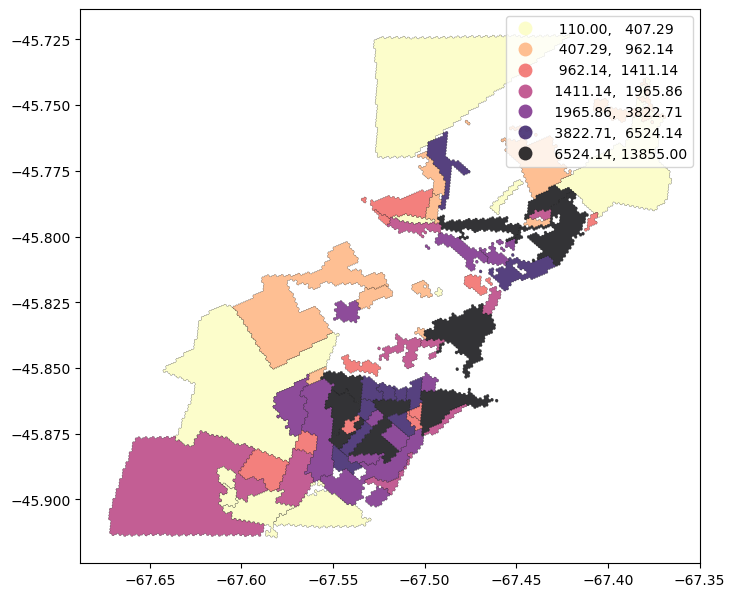

In [15]:
barrios.plot("join_barri",
             figsize = (8, 8),
             legend = True,
             scheme = "quantiles",
             k = 7,
             cmap = "magma_r",
             alpha = 0.8,
             edgecolor = "black",
             linewidth = 0.2)

In [20]:
barrios.explore("join_barri",
                scheme = "naturalbreaks",
                k = 7,
                cmap = "gist_heat_r")

c:\ProgramData\anaconda3\envs\GIS\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# descargar el archivo al directorio

barrios.to_file("barrios_h3_res10.shp")

In [12]:
# este es un borrador
m = (5*84)/(6*37)
m

1.8918918918918919